In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Завантаження датасету California Housing
california = fetch_california_housing()

In [3]:
# Отримання ознак (features) та цільової змінної (target)
X = california.data
y = california.target


In [4]:
# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 16512 samples
Test set size: 4128 samples


In [6]:
# Створення об'єкта моделі лінійної регресії
model = LinearRegression()

In [7]:
# Навчання моделі на навчальних даних
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Прогнозування на тестових даних
y_pred = model.predict(X_test)

In [9]:
# Оцінка продуктивності моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 0.56
R^2 Score: 0.58


In [11]:
# Прогнозування на навчальних даних
y_train_pred = model.predict(X_train)

# Оцінка продуктивності моделі на навчальних даних
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Оцінка продуктивності моделі на тестових даних
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Training R^2 Score: {train_r2:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test R^2 Score: {test_r2:.2f}")

Training Mean Squared Error (MSE): 0.52
Training R^2 Score: 0.61
Test Mean Squared Error (MSE): 0.56
Test R^2 Score: 0.58


In [13]:
# Створення моделей з регуляризацією
ridge = Ridge()
lasso = Lasso()

# Визначення параметрів для пошуку
param_grid_ridge = {'alpha': np.logspace(-4, 4, 9)}
param_grid_lasso = {'alpha': np.logspace(-4, 4, 9)}

In [14]:
# Налаштування GridSearchCV для Ridge
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Налаштування GridSearchCV для Lasso
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Виведення кращих параметрів та результатів для Ridge
print(f"Best Ridge alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Best Ridge CV score: {-grid_search_ridge.best_score_:.2f}")

# Виведення кращих параметрів та результатів для Lasso
print(f"Best Lasso alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Best Lasso CV score: {-grid_search_lasso.best_score_:.2f}")

Best Ridge alpha: 10.0
Best Ridge CV score: 0.52
Best Lasso alpha: 0.0001
Best Lasso CV score: 0.52


In [15]:
# Оцінка продуктивності на тестових даних для Ridge
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print(f"Ridge Test Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"Ridge Test R^2 Score: {ridge_r2:.2f}")

Ridge Test Mean Squared Error (MSE): 0.56
Ridge Test R^2 Score: 0.58


In [16]:
# Оцінка продуктивності на тестових даних для Lasso
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"Lasso Test Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"Lasso Test R^2 Score: {lasso_r2:.2f}")

Lasso Test Mean Squared Error (MSE): 0.56
Lasso Test R^2 Score: 0.58


In [17]:
# Оцінка продуктивності базової моделі лінійної регресії
y_pred_base = model.predict(X_test)
base_mse = mean_squared_error(y_test, y_pred_base)
base_r2 = r2_score(y_test, y_pred_base)

print(f"Base Model Test Mean Squared Error (MSE): {base_mse:.2f}")
print(f"Base Model Test R^2 Score: {base_r2:.2f}")

# Оцінка продуктивності моделі Ridge з оптимальним параметром регуляризації
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Test Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"Ridge Test R^2 Score: {ridge_r2:.2f}")

# Оцінка продуктивності моделі Lasso з оптимальним параметром регуляризації
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Lasso Test Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"Lasso Test R^2 Score: {lasso_r2:.2f}")

Base Model Test Mean Squared Error (MSE): 0.56
Base Model Test R^2 Score: 0.58
Ridge Test Mean Squared Error (MSE): 0.56
Ridge Test R^2 Score: 0.58
Lasso Test Mean Squared Error (MSE): 0.56
Lasso Test R^2 Score: 0.58


In [19]:
# Витягуємо результати GridSearchCV
ridge_results = grid_search_ridge.cv_results_
lasso_results = grid_search_lasso.cv_results_

# Гіперпараметри alpha
alphas = np.logspace(-4, 4, 9)

# Помилки для Ridge
ridge_mean_test_scores = -ridge_results['mean_test_score']

# Помилки для Lasso
lasso_mean_test_scores = -lasso_results['mean_test_score']

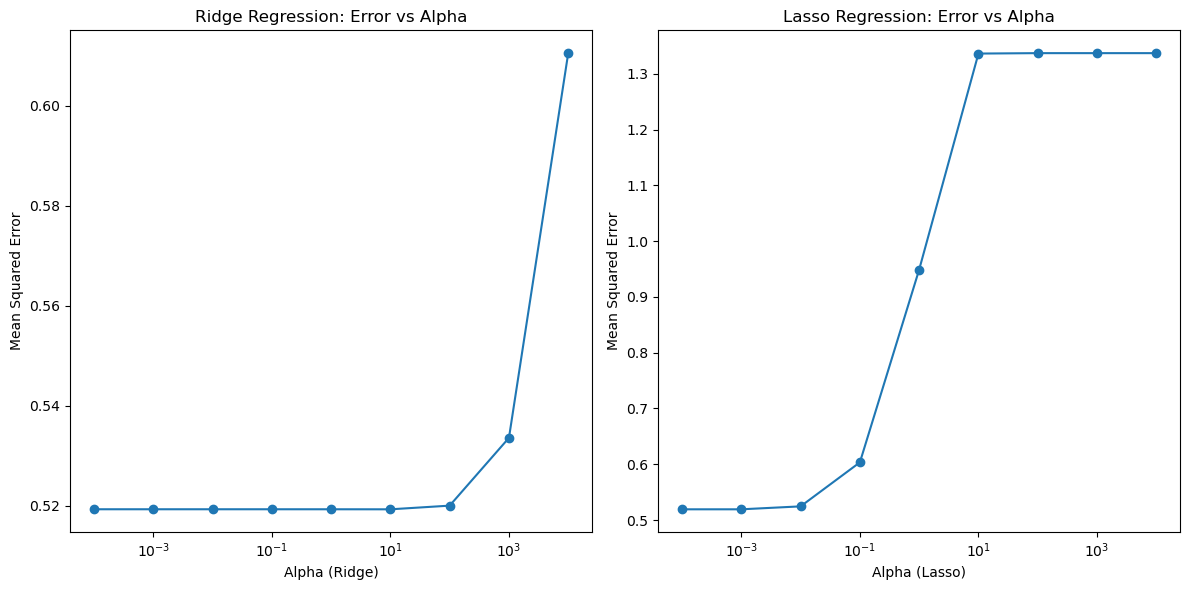

In [20]:
# Графік для Ridge Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Error vs Alpha')

# Графік для Lasso Regression
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: Error vs Alpha')

plt.tight_layout()
plt.show()

In [22]:
# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Визначення діапазону кількостей кластерів
k_range = range(2, 11)
inertia = []
silhouette_scores = []

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_

Text(0.5, 1.0, 'Elbow Method')

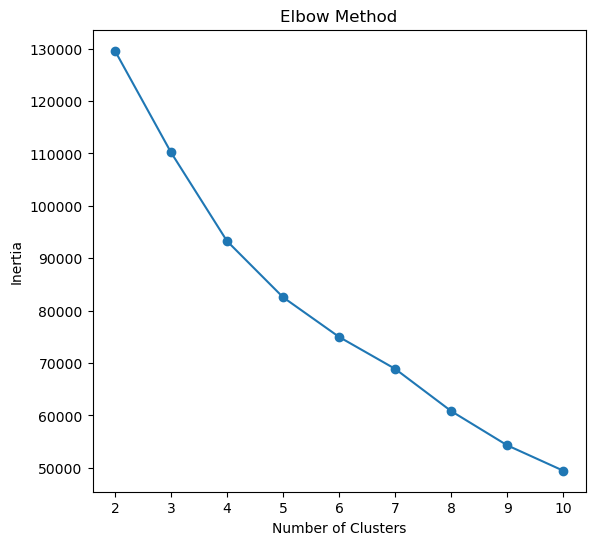

In [24]:
# Метод ліктя
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Візуалізація методу ліктя
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

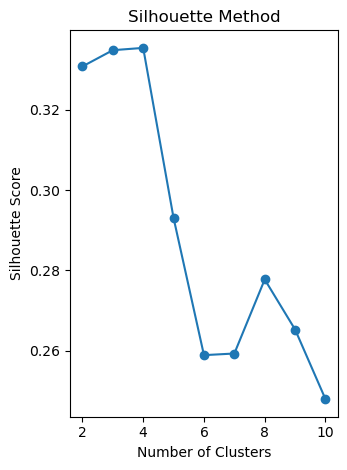

In [25]:
# Візуалізація методу силуетів
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

In [26]:
# Вибір оптимальної кількості кластерів на основі графіків
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

Optimal number of clusters based on silhouette score: 4


In [27]:
# Кластеризація з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


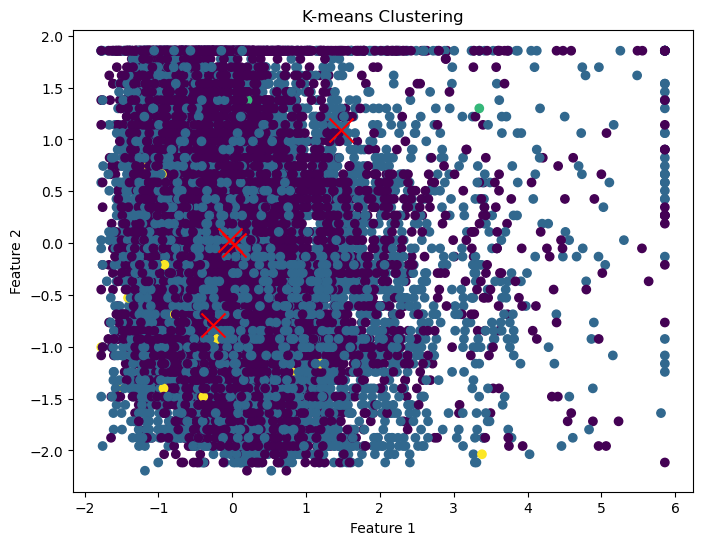

In [28]:
# Візуалізація кластерів
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

Метод Ліктя (Elbow Method):

Графік демонструє залежність між кількістю кластерів і інерцією (сумою квадратів відстаней точок до центру кластеру). Оптимальна кількість кластерів зазвичай відповідає "лік" на графіку, де інерція починає зменшуватися менш різко.
Метод Силуетів (Silhouette Method):

Графік показує середню оцінку силуету для кожної кількості кластерів. Оптимальна кількість кластерів має найвищу оцінку силуету, що свідчить про кращу сепарацію кластерів.
Візуалізація Кластерів:

Після вибору оптимальної кількості кластерів, візуалізуємо кластери разом із центрами кластерів. Це дозволяє оцінити, як добре кластеризуються дані та чи є перетворення між кластерами.